In [307]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# PyTorch related imports would go here
import numpy as np

In [308]:
from sklearn.feature_extraction.text import TfidfVectorizer
from us import states
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re

In [309]:
state_names = [state.name.lower() for state in states.STATES]
state_abbrs = [state.abbr for state in states.STATES]
city_df = pd.read_csv('PM25-Speciated/worldcities.csv')
city_names = city_df['city_ascii'].str.lower().tolist()  # First column
country_names = city_df['country'].str.lower().tolist()  # First column

In [310]:
stop_words = TfidfVectorizer(stop_words='english').get_stop_words()
stop_words = list(list(stop_words)+ city_names + country_names + state_names + state_abbrs)

# Original Data

In [311]:
df = pd.read_csv('PM25-Speciated/Speciate_Raw_V07052024.csv')

In [312]:
df

,code,name,mass,cat1,cat2,cat3,species,weight%
0,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Ammonium,0.023000
1,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Potassium,1.843000
2,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Selenium,0.025000
3,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Silicon,7.736000
4,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Sodium,1.377000
...,...,...,...,...,...,...,...,...
80895,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Potassium,17.899160
80896,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Sodium,0.168067
80897,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Sulfate,3.361345
80898,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Ammonium,2.184874


In [313]:
df = df.pivot_table(index=['code', 'name'], columns='species', values='weight%', aggfunc='first').reset_index()
# Fill NaN values with 0 (or any other value you prefer)
df = df.fillna(0)

In [314]:
df

species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,00000C,Overall Composite,4.079000,0.030000,0.806000,1.118000,0.0,0.285000,2.804000,0.0,...,0.0,8.933000,1.577000,0.00000,5.030000,2.457000,0.103000,0.059000,2.235000,0.004000
1,10,Overall Composite,3.819000,0.023000,0.809000,1.410000,0.0,0.385000,2.399000,0.0,...,0.0,7.736000,1.377000,0.00000,5.046000,2.632000,0.114000,0.058000,2.218000,0.002000
2,100CROC,Onroad Gasoline Cold Start,0.000000,0.430694,0.000000,0.000000,0.0,0.000000,0.387691,0.0,...,0.0,0.000000,0.005178,0.00000,0.945113,0.000000,0.000000,0.000000,0.078439,0.000000
3,101CROC,Onroad Gasoline Running,0.323953,2.778929,0.000000,0.000000,0.0,0.000000,1.443041,0.0,...,0.0,0.323953,0.039129,0.00000,7.187084,0.000000,0.000000,0.000000,0.592782,0.000000
4,102CROC,Onroad Diesel Non-DPF Idle,0.060154,1.739422,0.000000,0.000000,0.0,0.000000,0.584029,0.0,...,0.0,0.297084,0.307717,0.00000,5.266531,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,95806,Peat Fire-Smoldering-Minnesota AE6,0.000376,0.107249,0.000000,0.000905,0.0,0.000000,0.000000,0.0,...,0.0,0.001436,0.000000,0.00000,0.428752,0.283134,0.000000,0.000266,0.000000,0.000063
3801,95807,Forest Fire Understory-Flaming-Minnesota AE6,0.000000,0.059422,0.034348,0.001050,0.0,0.031667,0.000000,0.0,...,0.0,0.006495,0.000000,0.00000,0.318718,0.211847,0.000000,0.005668,0.035434,0.000000
3802,95808,Forest Fire Understory-Smoldering-Minnesota AE6,0.000000,0.057489,0.004902,0.000693,0.0,0.003139,0.032457,0.0,...,0.0,0.004388,0.051420,0.07137,0.512190,0.281013,0.001126,0.000298,0.005076,0.000067
3803,95809,Grass Fire-Field-Kansas AE6,0.039424,0.159261,0.002697,0.001284,0.0,0.001939,0.790562,0.0,...,0.0,0.881017,0.031122,0.00000,0.828073,0.382831,0.004751,0.000134,0.040129,0.000624


In [315]:
def clean_text(text):
    # Remove numbers and special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [316]:
df['name'] = df['name'].apply(clean_text)

In [317]:
df

species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,00000C,overall composite,4.079000,0.030000,0.806000,1.118000,0.0,0.285000,2.804000,0.0,...,0.0,8.933000,1.577000,0.00000,5.030000,2.457000,0.103000,0.059000,2.235000,0.004000
1,10,overall composite,3.819000,0.023000,0.809000,1.410000,0.0,0.385000,2.399000,0.0,...,0.0,7.736000,1.377000,0.00000,5.046000,2.632000,0.114000,0.058000,2.218000,0.002000
2,100CROC,onroad gasoline cold start,0.000000,0.430694,0.000000,0.000000,0.0,0.000000,0.387691,0.0,...,0.0,0.000000,0.005178,0.00000,0.945113,0.000000,0.000000,0.000000,0.078439,0.000000
3,101CROC,onroad gasoline running,0.323953,2.778929,0.000000,0.000000,0.0,0.000000,1.443041,0.0,...,0.0,0.323953,0.039129,0.00000,7.187084,0.000000,0.000000,0.000000,0.592782,0.000000
4,102CROC,onroad diesel nondpf idle,0.060154,1.739422,0.000000,0.000000,0.0,0.000000,0.584029,0.0,...,0.0,0.297084,0.307717,0.00000,5.266531,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,95806,peat firesmolderingminnesota ae,0.000376,0.107249,0.000000,0.000905,0.0,0.000000,0.000000,0.0,...,0.0,0.001436,0.000000,0.00000,0.428752,0.283134,0.000000,0.000266,0.000000,0.000063
3801,95807,understoryflamingminnesota ae,0.000000,0.059422,0.034348,0.001050,0.0,0.031667,0.000000,0.0,...,0.0,0.006495,0.000000,0.00000,0.318718,0.211847,0.000000,0.005668,0.035434,0.000000
3802,95808,understorysmolderingminnesota ae,0.000000,0.057489,0.004902,0.000693,0.0,0.003139,0.032457,0.0,...,0.0,0.004388,0.051420,0.07137,0.512190,0.281013,0.001126,0.000298,0.005076,0.000067
3803,95809,grass firefieldkansas ae,0.039424,0.159261,0.002697,0.001284,0.0,0.001939,0.790562,0.0,...,0.0,0.881017,0.031122,0.00000,0.828073,0.382831,0.004751,0.000134,0.040129,0.000624


In [318]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
text_cols = df.select_dtypes(include=[object]).columns

print(text_cols)

agg_funcs = {col: 'mean' for col in numeric_cols}
agg_funcs.update({col: lambda x: np.random.choice(x) for col in text_cols if col != 'name'})

pivot_df = df.groupby('name').agg(agg_funcs).reset_index()

Index(['code', 'name'], dtype='object', name='species')


In [319]:
pivot_df

species,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,Chloride ion,...,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium,code
0,,0.600621,0.148529,0.000179,0.000171,0.000000,0.067179,0.621743,0.000000,0.434421,...,1.889786,0.023657,0.013529,0.119179,0.092514,0.000686,0.001114,0.032771,0.000843,4012
1,ae,0.015400,0.110500,0.000500,0.000300,0.000000,0.000100,0.369300,0.000000,0.207000,...,0.062000,0.012200,0.000000,0.133200,0.079200,0.001500,0.000100,0.002900,0.000000,3766AE6
2,agricultural burning composite,0.030000,1.800000,0.000000,0.000000,0.000000,0.000000,0.033000,0.000000,0.000000,...,0.015000,0.655000,0.000000,1.645600,0.649950,0.000000,0.000000,0.010000,0.000000,91103
3,agricultural burning composite wheat straw ric...,0.000000,1.415094,0.000000,0.009057,0.028302,0.000000,0.000000,0.764151,12.264151,...,0.000000,0.000000,1.226415,1.603774,0.000000,0.000000,0.000000,0.025472,0.000000,95504
4,agricultural burning corn stalk,0.000000,1.000000,0.000000,0.032500,0.044167,0.000000,0.000000,0.733333,6.750000,...,0.000000,0.000000,1.250000,2.000000,0.000000,0.000000,0.000000,0.009167,0.000000,95503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,wood stoves oak fuel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000,4210310
882,woodfired boiler,0.859125,0.000000,0.012625,0.013625,0.000000,0.001625,4.602500,0.000000,0.000000,...,0.918125,3.745000,0.000000,12.360625,3.665250,0.007250,0.004375,0.507500,0.004375,12704C
883,woodfired industrial boiler nwwas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000,0.000000,0.000000,...,16.200000,0.180000,0.000000,7.800000,3.700000,0.000000,0.000000,0.000000,0.000000,4704
884,woodfired industrial boiler sampled denuder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000,0.000000,0.000000,...,16.200000,0.180000,0.000000,7.800000,3.700000,0.000000,0.000000,0.000000,0.000000,4705


In [320]:
cols = list(pivot_df.columns)
cols.insert(0, cols.pop(cols.index('code')))
pivot_df = pivot_df[cols]
pivot_df

species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Silica,Silicon,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium
0,4012,,0.600621,0.148529,0.000179,0.000171,0.000000,0.067179,0.621743,0.000000,...,0.0,1.889786,0.023657,0.013529,0.119179,0.092514,0.000686,0.001114,0.032771,0.000843
1,3766AE6,ae,0.015400,0.110500,0.000500,0.000300,0.000000,0.000100,0.369300,0.000000,...,0.0,0.062000,0.012200,0.000000,0.133200,0.079200,0.001500,0.000100,0.002900,0.000000
2,91103,agricultural burning composite,0.030000,1.800000,0.000000,0.000000,0.000000,0.000000,0.033000,0.000000,...,0.0,0.015000,0.655000,0.000000,1.645600,0.649950,0.000000,0.000000,0.010000,0.000000
3,95504,agricultural burning composite wheat straw ric...,0.000000,1.415094,0.000000,0.009057,0.028302,0.000000,0.000000,0.764151,...,0.0,0.000000,0.000000,1.226415,1.603774,0.000000,0.000000,0.000000,0.025472,0.000000
4,95503,agricultural burning corn stalk,0.000000,1.000000,0.000000,0.032500,0.044167,0.000000,0.000000,0.733333,...,0.0,0.000000,0.000000,1.250000,2.000000,0.000000,0.000000,0.000000,0.009167,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,4210310,wood stoves oak fuel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000
882,12704C,woodfired boiler,0.859125,0.000000,0.012625,0.013625,0.000000,0.001625,4.602500,0.000000,...,0.0,0.918125,3.745000,0.000000,12.360625,3.665250,0.007250,0.004375,0.507500,0.004375
883,4704,woodfired industrial boiler nwwas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000,0.000000,...,0.0,16.200000,0.180000,0.000000,7.800000,3.700000,0.000000,0.000000,0.000000,0.000000
884,4705,woodfired industrial boiler sampled denuder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000,0.000000,...,0.0,16.200000,0.180000,0.000000,7.800000,3.700000,0.000000,0.000000,0.000000,0.000000


# Clustering based on name

In [321]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(pivot_df['name'].str.replace('[-,%/0-9&)(]', '', regex=True).str.lower())

In [322]:
num_clusters = 32
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto')
pivot_df['cluster_kmeans'] = kmeans.fit_predict(X)

/tmp/ipykernel_58237/301590656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df['cluster_kmeans'] = kmeans.fit_predict(X)


In [323]:
for cluster_num in range(num_clusters):
    print(f"\nCluster {cluster_num}:")
    cluster_texts = pivot_df[pivot_df['cluster_kmeans'] == cluster_num]['name']
    for text in cluster_texts:
        print(f" - {text}")


Cluster 0:
 - kerosene combustion soot

Cluster 1:
 - nonroad diesel airport
 - nonroad diesel dpf
 - nonroad diesel marine
 - nonroad diesel nondpf
 - nonroad diesel rail
 - nonroad gas turbine aircraft
 - nonroad gasoline
 - nonroad gasoline exhaust composite
 - nonroad gasoline exhaust simplified
 - nonroad residual oil marine
 - onroad diesel nondpf idle
 - onroad diesel nondpf startrun

Cluster 2:
 - fireplace wood combustion american beech
 - fireplace wood combustion ash
 - fireplace wood combustion balsam fir
 - fireplace wood combustion black cherry
 - fireplace wood combustion black oak
 - fireplace wood combustion eastern
 - fireplace wood combustion eastern hemlock
 - fireplace wood combustion fir
 - fireplace wood combustion loblolly
 - fireplace wood combustion mockernut
 - fireplace wood combustion northern red oak
 - fireplace wood combustion oak
 - fireplace wood combustion paper birch
 - fireplace wood combustion pinyon
 - fireplace wood combustion ponderosa
 - firep

In [324]:
def majority_name(cluster):
    return pivot_df[pivot_df['cluster_kmeans'] == cluster]['name'].mode()[0]

pivot_df['assigned_profile'] = pivot_df['cluster_kmeans'].apply(majority_name)

/tmp/ipykernel_58237/813524329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df['assigned_profile'] = pivot_df['cluster_kmeans'].apply(majority_name)


In [325]:
pivot_df

species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Sodium,Sodium ion,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium,cluster_kmeans,assigned_profile
0,4012,,0.600621,0.148529,0.000179,0.000171,0.000000,0.067179,0.621743,0.000000,...,0.023657,0.013529,0.119179,0.092514,0.000686,0.001114,0.032771,0.000843,7,
1,3766AE6,ae,0.015400,0.110500,0.000500,0.000300,0.000000,0.000100,0.369300,0.000000,...,0.012200,0.000000,0.133200,0.079200,0.001500,0.000100,0.002900,0.000000,15,ae
2,91103,agricultural burning composite,0.030000,1.800000,0.000000,0.000000,0.000000,0.000000,0.033000,0.000000,...,0.655000,0.000000,1.645600,0.649950,0.000000,0.000000,0.010000,0.000000,10,agricultural burning composite
3,95504,agricultural burning composite wheat straw ric...,0.000000,1.415094,0.000000,0.009057,0.028302,0.000000,0.000000,0.764151,...,0.000000,1.226415,1.603774,0.000000,0.000000,0.000000,0.025472,0.000000,10,agricultural burning composite
4,95503,agricultural burning corn stalk,0.000000,1.000000,0.000000,0.032500,0.044167,0.000000,0.000000,0.733333,...,0.000000,1.250000,2.000000,0.000000,0.000000,0.000000,0.009167,0.000000,10,agricultural burning composite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,4210310,wood stoves oak fuel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000,7,
882,12704C,woodfired boiler,0.859125,0.000000,0.012625,0.013625,0.000000,0.001625,4.602500,0.000000,...,3.745000,0.000000,12.360625,3.665250,0.007250,0.004375,0.507500,0.004375,29,boiler fuel oil fired
883,4704,woodfired industrial boiler nwwas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000,0.000000,...,0.180000,0.000000,7.800000,3.700000,0.000000,0.000000,0.000000,0.000000,29,boiler fuel oil fired
884,4705,woodfired industrial boiler sampled denuder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000,0.000000,...,0.180000,0.000000,7.800000,3.700000,0.000000,0.000000,0.000000,0.000000,29,boiler fuel oil fired


# Clustering based on numeric values

In [326]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

In [327]:
def assign_cluster_name(cluster):
    names = pivot_df[pivot_df['speciated_cluster'] == cluster]['name']
    most_common_name = Counter(names).most_common(1)[0][0]
    return most_common_name

In [328]:
X = pivot_df.iloc[:, 2:47]
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [329]:
model = NMF(n_components=32, init='random', random_state=0, max_iter=1000)
W = model.fit_transform(X)
H = model.components_

In [330]:
n_clusters = 32
kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init='auto')
pivot_df['speciated_cluster'] = kmeans.fit_predict(X)

# Create a new column for cluster names
pivot_df['speciated_cluster_name'] = pivot_df['speciated_cluster'].apply(assign_cluster_name)

pivot_df.head()

/tmp/ipykernel_58237/3619444706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df['speciated_cluster'] = kmeans.fit_predict(X)
/tmp/ipykernel_58237/3619444706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df['speciated_cluster_name'] = pivot_df['speciated_cluster'].apply(assign_cluster_name)


species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Sulfate,Sulfur,Tin,Vanadium,Zinc,Zirconium,cluster_kmeans,assigned_profile,speciated_cluster,speciated_cluster_name
0,4012,,0.600621,0.148529,0.000179,0.000171,0.000000,0.067179,0.621743,0.000000,...,0.119179,0.092514,0.000686,0.001114,0.032771,0.000843,7,,5,
1,3766AE6,ae,0.015400,0.110500,0.000500,0.000300,0.000000,0.000100,0.369300,0.000000,...,0.133200,0.079200,0.001500,0.000100,0.002900,0.000000,15,ae,5,
2,91103,agricultural burning composite,0.030000,1.800000,0.000000,0.000000,0.000000,0.000000,0.033000,0.000000,...,1.645600,0.649950,0.000000,0.000000,0.010000,0.000000,10,agricultural burning composite,5,
3,95504,agricultural burning composite wheat straw ric...,0.000000,1.415094,0.000000,0.009057,0.028302,0.000000,0.000000,0.764151,...,1.603774,0.000000,0.000000,0.000000,0.025472,0.000000,10,agricultural burning composite,5,
4,95503,agricultural burning corn stalk,0.000000,1.000000,0.000000,0.032500,0.044167,0.000000,0.000000,0.733333,...,2.000000,0.000000,0.000000,0.000000,0.009167,0.000000,10,agricultural burning composite,5,


In [331]:
for cluster_num in range(n_clusters):
    print(f"\nCluster {cluster_num}:")
    cluster_texts = pivot_df[pivot_df['speciated_cluster'] == cluster_num]['name']
    for text in cluster_texts:
        print(f" - {text}")


Cluster 0:
 - copper ore concentrate
 - copper oxide kiln
 - copper processing composite
 - primary copper roaster
 - primary lead smelting speiss fugitive dust
 - secondary copper pyrometal cathode charge
 - secondary copper pyrometal regular charge

Cluster 1:
 - coke calciner composite
 - gypsum calciner
 - gypsum handling
 - gypsum manufacturing composite
 - marble
 - refinery process heaters gas

Cluster 2:
 - bituminous combustion composite
 - bituminous combustion simplified
 - burning
 - carborundum manufacturing
 - cement kiln coalfired
 - cement production composite
 - cement production simplified
 - combustion
 - distillate oil combustion
 - distillate oil combustion composite
 - distillate oil combustion simplified
 - draft bituminous combustion composite
 - draft bituminous combustion simplified
 - draft burning simplified
 - draft cement production composite
 - draft cement production simplified
 - draft distillate oil combustion simplified
 - draft geothermal background

## Data preprocessing

In [332]:
category_for_classification = 'speciated_cluster_name' 
#'assigned_profile', #'speciated_cluster_name'

In [333]:
# # Step 1: Read the CSV into a pandas dataframe

# filename = 'PM25-Speciated/IMPROVEDataset/usepa_final_with_assigned_profile.csv'
# df = pd.read_csv(filename)

In [334]:
# df

In [335]:
# Create a dictionary to map categories to numerical values
category_mapping = {category: index for index, category in enumerate(pivot_df[category_for_classification].unique())}

In [336]:
# Replace string categories with numerical values
pivot_df['final_profile'] = pivot_df[category_for_classification].map(category_mapping)

# The updated DataFrame and the mapping dictionary
print(category_mapping)
pivot_df

{'': 0, 'agricultural burning rice straw': 1, 'agricultural soil': 2, 'aluminum foundryreverboratory furnace': 3, 'ammonium nitrate prill tower': 4, 'ammonium sulfate production': 5, 'ammonium sulfate production composite': 6, 'antimony oxide plant antimony roasting': 7, 'asphalt manufacturing composite': 8, 'biomass burning dambo grass': 9, 'biomass burning excelsior': 10, 'biomass burning ponderosa wood': 11, 'bituminous combustion composite': 12, 'calcium carbide furnace': 13, 'catalytic cracker composite': 14, 'catalytic cracking composite': 15, 'coke calciner composite': 16, 'combustion fluidizedbed incinerator fluidizedbed product': 17, 'composite wear': 18, 'copper ore concentrate': 19, 'diesel exhaust': 20, 'draft copper production composite': 21, 'draft electric arc furnace composite': 22, 'draft lime kiln composite': 23, 'gasoline exhaust leaded': 24, 'gasoline exhaust winter low emitter': 25, 'heavy duty vehicles leaded': 26, 'iron steel manufacturing': 27, 'lead production 

/tmp/ipykernel_58237/2693875221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_df['final_profile'] = pivot_df[category_for_classification].map(category_mapping)


species,code,name,Aluminum,Ammonium,Antimony,Arsenic,Bromine,Cadmium,Calcium,Calcium ion,...,Sulfur,Tin,Vanadium,Zinc,Zirconium,cluster_kmeans,assigned_profile,speciated_cluster,speciated_cluster_name,final_profile
0,4012,,0.600621,0.148529,0.000179,0.000171,0.000000,0.067179,0.621743,0.000000,...,0.092514,0.000686,0.001114,0.032771,0.000843,7,,5,,0
1,3766AE6,ae,0.015400,0.110500,0.000500,0.000300,0.000000,0.000100,0.369300,0.000000,...,0.079200,0.001500,0.000100,0.002900,0.000000,15,ae,5,,0
2,91103,agricultural burning composite,0.030000,1.800000,0.000000,0.000000,0.000000,0.000000,0.033000,0.000000,...,0.649950,0.000000,0.000000,0.010000,0.000000,10,agricultural burning composite,5,,0
3,95504,agricultural burning composite wheat straw ric...,0.000000,1.415094,0.000000,0.009057,0.028302,0.000000,0.000000,0.764151,...,0.000000,0.000000,0.000000,0.025472,0.000000,10,agricultural burning composite,5,,0
4,95503,agricultural burning corn stalk,0.000000,1.000000,0.000000,0.032500,0.044167,0.000000,0.000000,0.733333,...,0.000000,0.000000,0.000000,0.009167,0.000000,10,agricultural burning composite,5,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,4210310,wood stoves oak fuel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,0.000000,0.000000,0.000000,0.000000,7,,5,,0
882,12704C,woodfired boiler,0.859125,0.000000,0.012625,0.013625,0.000000,0.001625,4.602500,0.000000,...,3.665250,0.007250,0.004375,0.507500,0.004375,29,boiler fuel oil fired,25,agricultural burning rice straw,1
883,4704,woodfired industrial boiler nwwas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000,0.000000,...,3.700000,0.000000,0.000000,0.000000,0.000000,29,boiler fuel oil fired,24,asphalt manufacturing composite,8
884,4705,woodfired industrial boiler sampled denuder,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000,0.000000,...,3.700000,0.000000,0.000000,0.000000,0.000000,29,boiler fuel oil fired,24,asphalt manufacturing composite,8


In [337]:
len(category_mapping)

32

In [338]:
mapping_category = {value:key for key, value in category_mapping.items()}

In [339]:
# Step 2: Apply Non-negative matrix factorization on the data except last column
# Handle missing values by filling them with the mean of the column
# df.fillna(df.mean(), inplace=True)

In [340]:
# Separate features and target
X = pivot_df.iloc[:, 2:47].values
y = pivot_df['final_profile'].values

In [341]:
print(X.shape)
print(y.shape)

(886, 45)
(886,)


## NMF

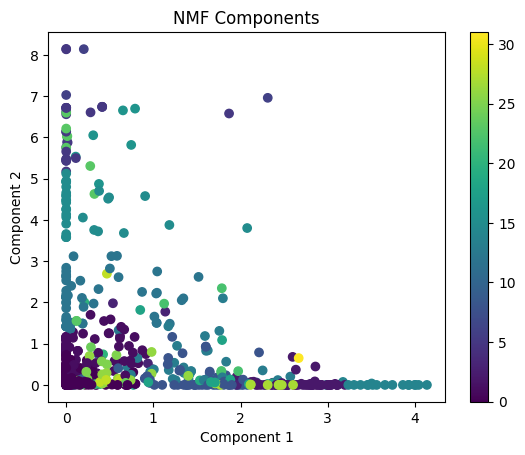

In [342]:
# Initialize NMF and fit to the data
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

# Visualize the data
plt.scatter(W[:, 0], W[:, 1], c=y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('NMF Components')
plt.colorbar()
plt.show()

## Graph Construction from NMF

## MLP

In [343]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import random
import numpy as np

In [344]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Example usage
set_seed(42)

In [345]:
# Step 3: Use PyTorch MLP to classify the last column
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [346]:
X_scaled = torch.FloatTensor(X_scaled)
y = torch.LongTensor(y)

In [347]:
# Assuming X and y are already defined as PyTorch tensors
# X = features tensor
# y = labels tensor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [348]:
print(X_train.shape)
print(X_test.shape)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

torch.Size([708, 45])
torch.Size([178, 45])


In [349]:

# Define a simple MLP model for multi-class classification
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train.shape[1], 256),
            nn.ReLU(),
            nn.Linear(256, len(category_mapping))  # Adjusted for 29 classes
        )
        
    def forward(self, x):
        return self.layers(x)

# Initialize the model
model = MLP()

In [350]:
model

MLP(
  (layers): Sequential(
    (0): Linear(in_features=45, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=32, bias=True)
  )
)

In [351]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = torch.optim.Adam(model.parameters())

In [352]:
def train():
    # Training loop
    for epoch in range(1000):  # number of epochs can be adjusted
        for batch_idx, (data, target) in enumerate(train_loader):
            # Forward pass
            output = model(data)
            loss = criterion(output, target)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

train()

Epoch 0, Loss: 3.033452033996582
Epoch 50, Loss: 0.19312286376953125
Epoch 100, Loss: 0.03807884454727173
Epoch 150, Loss: 0.02966935746371746
Epoch 200, Loss: 0.0036875803489238024
Epoch 250, Loss: 0.0022344784811139107
Epoch 300, Loss: 0.00043322856072336435
Epoch 350, Loss: 0.00018318866204936057
Epoch 400, Loss: 0.0005379869835451245
Epoch 450, Loss: 0.0006982861086726189
Epoch 500, Loss: 0.0021432903595268726
Epoch 550, Loss: 0.00014110397023614496
Epoch 600, Loss: 0.0020512265618890524
Epoch 650, Loss: 0.0
Epoch 700, Loss: 0.00014861700765322894
Epoch 750, Loss: 7.595460920128971e-05
Epoch 800, Loss: 0.00046441113227047026
Epoch 850, Loss: 7.664049917366356e-05
Epoch 900, Loss: 2.324488559679594e-05
Epoch 950, Loss: 4.053090833622264e-06


In [353]:
def test():
    model.eval()
    test_loss = 0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            all_targets.extend(target.tolist())
            all_predictions.extend(output.argmax(dim=1).tolist())

    test_loss /= len(test_loader.dataset)
    print(f"Test Loss: {test_loss}")

    # Calculate F1 score
    f1 = f1_score(all_targets, all_predictions, average='weighted')
    print(f"F1 Score: {f1}")
    
    return all_predictions, all_targets
    
pred, target = test()

Test Loss: 0.03526600090305457
F1 Score: 0.8413535214992759


In [354]:
for i, j in zip(pred, target):
    print("Pred:",mapping_category[i],"\n","True:",mapping_category[j])
    print()

Pred: biomass burning dambo grass 
 True: biomass burning dambo grass

Pred:  
 True: 

Pred: gasoline exhaust winter low emitter 
 True: gasoline exhaust winter low emitter

Pred:  
 True: 

Pred:  
 True: 

Pred: draft copper production composite 
 True: draft copper production composite

Pred:  
 True: 

Pred: agricultural burning rice straw 
 True: agricultural burning rice straw

Pred: asphalt manufacturing composite 
 True: asphalt manufacturing composite

Pred: iron steel manufacturing 
 True: iron steel manufacturing

Pred: agricultural burning rice straw 
 True: agricultural burning rice straw

Pred: calcium carbide furnace 
 True: calcium carbide furnace

Pred: calcium carbide furnace 
 True: calcium carbide furnace

Pred:  
 True: 

Pred: agricultural soil 
 True: agricultural soil

Pred:  
 True: 

Pred:  
 True: 

Pred: draft lime kiln composite 
 True: draft lime kiln composite

Pred:  
 True: 

Pred: agricultural burning rice straw 
 True: bituminous combustion composite